## Dependence - Example 1
Author: Dimitris Giovanis

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Distributions import Distribution
from UQpy.Transformations import Nataf
import numpy as np
import matplotlib.pyplot as plt

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.03318884556773309]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.0017516815627354849]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 9.370144498550307e-05]
UQpy: ITAM Done.
[[1.  0.9]
 [0.9 1. ]] [[1.         0.92289429]
 [0.92289429 1.        ]]


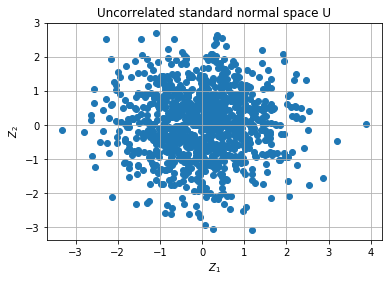

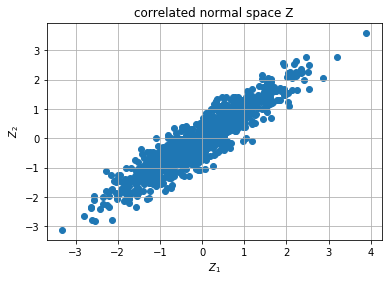

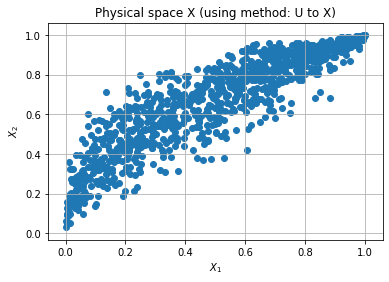

In [2]:
# Example 1: 

dist_name = ['uniform', 'beta']
dist_params = [[0, 1], [2, 1]]

distribution = [None] * 2
for j in range(2):
    distribution[j] = Distribution(dist_name[j])
    
R = np.array([[1.0, 0.9], [0.9, 1.0]])
# Generate uncorrelated standard normal samples using MCS class
from UQpy.SampleMethods import MCS
u = MCS(dist_name=['normal', 'normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000).samples

R0 = Nataf.distortion_x_to_z(distribution, dist_params, R)
z = Nataf.transform_u_to_z(u, R0)
print(R, R0)

x, jacobian_u_to_x = Nataf.transform_u_to_x(u, R0, distribution, dist_params)

# Plot the initial samples
plt.figure()
plt.title('Uncorrelated standard normal space U')
plt.scatter(u[:, 0], u[:, 1])
plt.grid(True)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()

# Plot the initial samples
plt.figure()
plt.title('correlated normal space Z')
plt.scatter(z[:, 0], z[:, 1])
plt.grid(True)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()

# Plot the initial samples
plt.figure()
plt.title('Physical space X (using method: U to X)')
plt.scatter(x[:, 0], x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.03318884556773309]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.0017516815627354849]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 9.370144498550307e-05]
UQpy: ITAM Done.


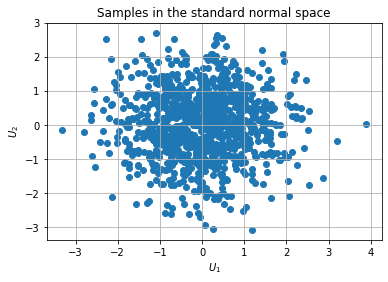

In [3]:
# Nataf transformation

p1 = Nataf(corr=R, dist_name=dist_name, dist_params=dist_params, dimension=2)
p1.transform(x)

# Plot the uncorrelated samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(p1.u[:, 0], p1.u[:, 1])
plt.grid(True)
plt.title('Samples in the standard normal space')
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

UQpy: Computing Nataf correlation distortion...
UQpy: Done.


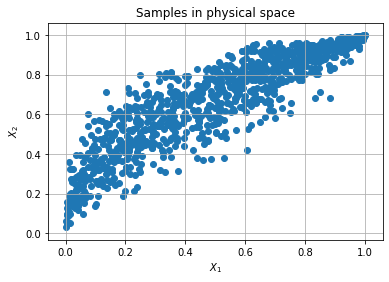

In [5]:
# Inverse Nataf transformation

p2 = Nataf(corr=R0, dist_name=dist_name, dist_params=dist_params, dimension=2)
p2.inverse(u)

# Plot the uncorrelated samples
plt.figure()
plt.title('Samples in physical space')
plt.scatter(p2.x[:, 0], p2.x[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()